In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import koreanize_matplotlib

In [4]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

#### 개별종목 시세 가져오기

In [5]:
import FinanceDataReader as fdr

In [6]:
#CSV 파일 불러오기
df_stocks = pd.read_csv('stocks.csv')

In [7]:
df_stocks.shape

(2855, 23)

#### 종목명으로 종목 코드 받아오는 함수 만들기

- str.contains(str) : 특정 문자열이 포함되어있는지

In [8]:
# 종목명으로 코드 조회하는 함수 (정확히 모를떄 특정 문자열이 포함된)
def find_codes_by_name(name) :
    try : 
        return df_stocks[df_stocks['Name'].str.contains(name)][['Code','Name']]
    except IndexError as e:
        return -1
        

In [9]:
# 종목명으로 코드 조회하는 함수 (정확히 알때)
def find_code_by_name(name) :
    try : 
        return df_stocks[df_stocks['Name'] == name]['Code'].values[0]
    except IndexError as e:
        return -1
        

In [97]:
find_code_by_name('삼성전자')

'005930'

In [52]:
find_code_by_name('삼성전자1')

-1

In [11]:
# 종목명으로 일별 시세 받아오는 함수

def get_daily_price(name,start,end=None) :
    return fdr.DataReader(find_code_by_name(name),start,end)

In [66]:
type(find_code_by_name('삼성전자'))

pandas.core.frame.DataFrame

In [12]:
df_samsung = get_daily_price('삼성전자','2024-01-01')

In [13]:
df_samsung.shape

(231, 6)

In [95]:
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-08-18,6500,6520,6200,6200,427433,NaN
2000-08-21,6200,6340,6190,6270,419000,0.011290
2000-08-22,6260,6470,6240,6460,554252,0.030303
2000-08-23,6450,6450,6160,6190,558191,-0.041796
2000-08-24,6260,6300,6100,6220,634031,0.004847
...,...,...,...,...,...,...
2024-12-03,53100,54400,53100,53600,23374603,0.000000
2024-12-04,52000,53400,52000,53100,29004766,-0.009328
2024-12-05,53200,54400,53200,53700,23588277,0.011299


In [34]:
# 삼성전자 일별 시세 가져오기
# df = fdr.DataReader('005930', '2024-01-01')
# df_stock = fdr.DataReader('005930')

df_samsung = get_daily_price('삼성전자')

In [39]:
df_samsung.shape

(6000, 6)

In [15]:
df_samsung.head(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013
2024-01-03,78500,78800,77000,77000,21753644,-0.032663
2024-01-04,76100,77300,76100,76600,15324439,-0.005195


In [14]:
df_samsung.tail(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-12-06,53900,54400,52700,54100,22861874,0.007449
2024-12-09,53500,54600,53200,53400,26227680,-0.012939
2024-12-10,54500,54500,53700,53700,12218529,0.005618


<Axes: xlabel='Date'>

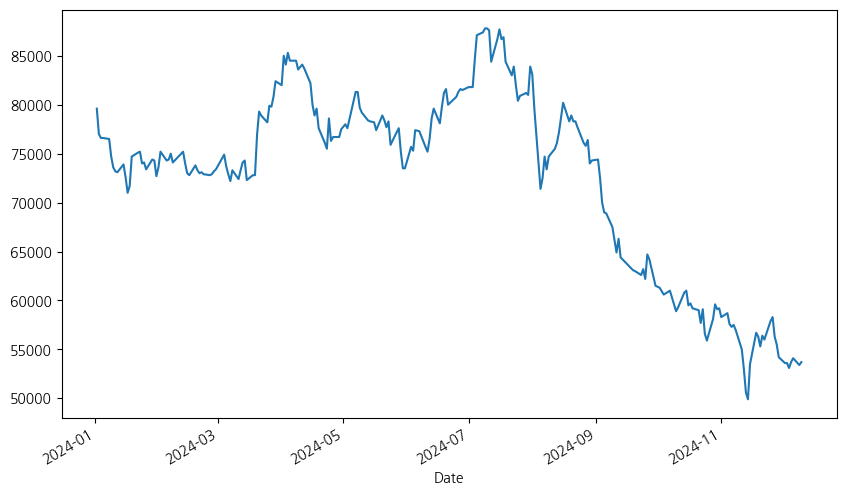

In [26]:
df_samsung['Close'].plot(kind='line',figsize=(10,6))

<Axes: xlabel='Date'>

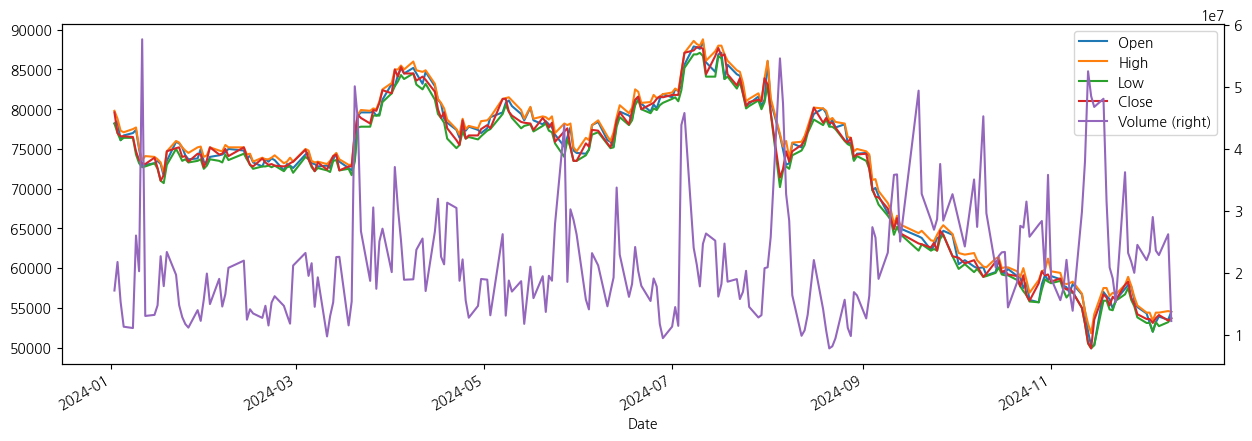

In [31]:
# 2축그래프 - 단위가 크게 다른 경우 y축의 단위를 서로 다르게줘서 가독성있는 그래프 제공
# secondary_y : 두번째 y축
df_samsung[['Open','High','Low','Close','Volume']].plot(kind='line',secondary_y='Volume', figsize=(15,5))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

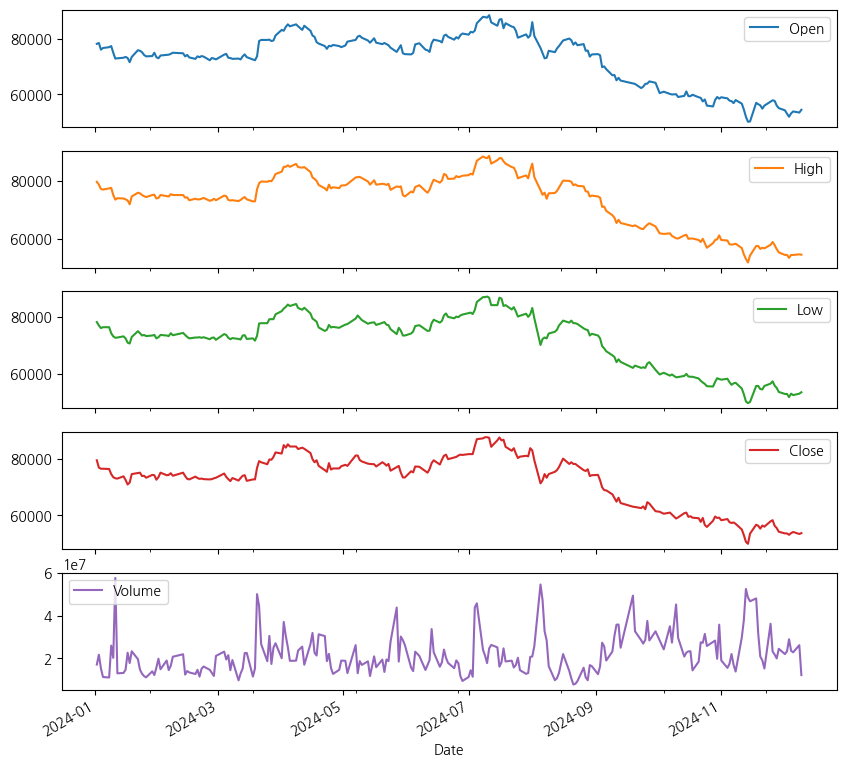

In [35]:
df_samsung[['Open','High','Low','Close','Volume']].plot(kind='line', subplots=True, figsize=(10,10))

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

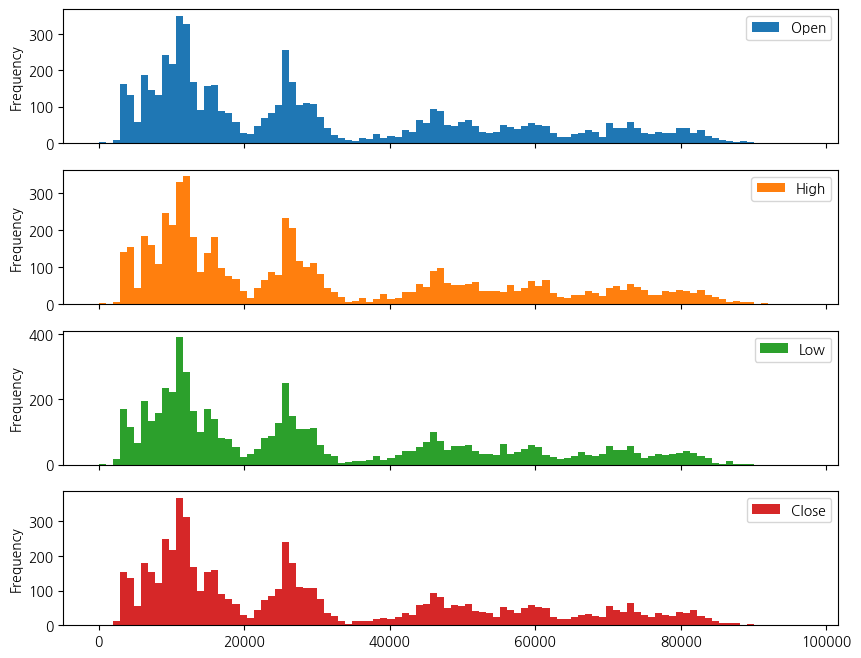

In [107]:
df_samsung[['Open','High','Low','Close']].plot(kind='hist', subplots=True, figsize=(10,8), bins=100)